In [3]:
my_env = !which python
print(my_env)
assert 'nlp' in my_env[0], f'Wrong virtual environment for GPU: {my_env}'

['/Users/mcirtain/miniconda3/envs/nlp/bin/python']


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

roberta_df = pd.read_json('../../data/roberta_polarity_scores_not_normalized_04162023.0743.json')

print(roberta_df.columns)
roberta_df.head()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'conversation_id', 'lang',
       'reply_settings', 'created_at', 'clean_text', 'text', 'author_id',
       'referenced_tweets', 'id', 'edit_history_tweet_ids',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.impression_count',
       'in_reply_to_user_id', 'geo.place_id', 'withheld.copyright',
       'withheld.country_codes', 'geo.coordinates.type',
       'geo.coordinates.coordinates', 'textblob_Polarity',
       'textblob_Subjectivity', 'vader_Polarity', 'vader_Subjectivity',
       'AFINN_scores', 'AFINN_sentiments', 'SentiWordNet_scores',
       'normalized_textblob_Polarity', 'normalized_textblob_Subjectivity',
       'normalized_vader_Polarity', 'normalized_vader_Subjectivity',
       'normalized_AFINN_scores', 'normalized_SentiWordNet_scores',
       'our_label', 'annotator', 'roberta_content', 'roberta_polarity',
       'roberta_sentiment'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,...,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator,roberta_content,roberta_polarity,roberta_sentiment
0,0,0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry_bucky hes lucky a #chrisrocklive ...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",...,0.527778,0.176602,0.640625,0.448980,0.444444,None,None,RT @user He’s lucky a #ChrisRockLive was the w...,-0.635149,negative
1,1,1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",...,0.000000,0.217017,0.529018,0.367347,0.333333,None,None,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative
2,2,2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",...,0.000000,0.217017,0.529018,0.367347,0.333333,None,None,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative
3,3,3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,rt rolandsmartin working out and watching the...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",...,0.535714,0.702710,0.191964,0.489796,0.412698,None,None,RT @user Working out and watching the @user @u...,0.388473,positive
4,4,4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,rt rolandsmartin workout done ill have a few ...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",...,0.535714,0.702710,0.219866,0.489796,0.412698,None,None,RT @user Workout done. I’ll have a few comment...,0.168381,neutral


# Data Prep

#### Recover keyword again

In [5]:
twitter_data = '../../data/deduplicated_final_.2023-04-02_11.38.26.083972.tsv'
tweets_df = pd.read_csv(twitter_data, sep='\t')
df = roberta_df.merge(tweets_df[['conversation_id', 'keyword']], left_on='conversation_id', 
                right_on='conversation_id', how='inner')

df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df.head()


,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,edit_history_tweet_ids,...,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator,roberta_content,roberta_polarity,roberta_sentiment,keyword
0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry_bucky hes lucky a #chrisrocklive ...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,['1633954063934009354'],...,0.176602,0.640625,0.448980,0.444444,None,None,RT @user He’s lucky a #ChrisRockLive was the w...,-0.635149,negative,#chrisrocklive
1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,['1633954058212876289'],...,0.217017,0.529018,0.367347,0.333333,None,None,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative,#chrisrocklive
2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,['1633951267423768578'],...,0.217017,0.529018,0.367347,0.333333,None,None,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative,#chrisrocklive
3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,rt rolandsmartin working out and watching the...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,['1633950853626318850'],...,0.702710,0.191964,0.489796,0.412698,None,None,RT @user Working out and watching the @user @u...,0.388473,positive,#chrisrocklive
4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,rt rolandsmartin workout done ill have a few ...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,['1633950824664645634'],...,0.702710,0.219866,0.489796,0.412698,None,None,RT @user Workout done. I’ll have a few comment...,0.168381,neutral,#chrisrocklive


#### Normalize roberta

In [6]:
import numpy as np
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

df['normalized_roberta_polarity'] = min_max_scaler.fit_transform(df['roberta_polarity'].to_numpy().reshape(-1, 1)).reshape(df['roberta_polarity'].shape)
df[[x for x in df.columns if 'roberta' in x]].describe()


,roberta_polarity,normalized_roberta_polarity
count,30611.000000,30611.000000
mean,-0.146230,0.398263
std,0.424734,0.282847
min,-0.744277,0.000000
25%,-0.515359,0.152445
50%,-0.197375,0.364203
75%,0.069886,0.542183
max,0.757362,1.000000


#### write data to file

In [7]:
from datetime import datetime
# timestamp = str(datetime.now()).replace(' ', '_').replace(':', '.')
# output_filepath = f'../../data/five_models_normalized_data_{timestamp}.tsv'
# df.to_csv(output_filepath, sep='\t')
# df.to_json(output_filepath.replace('.tsv', '.json'))
# print(f"wrote {output_filepath} and \nwrote {output_filepath.replace('.tsv', '.json')}")

In [8]:
roberta_df = None
tweets_df = None

# Visualizations

- how do the models compare on our annotated tweets?

In [9]:
df = pd.read_json('../../data/five_models_normalized_data_2023-04-17_22.57.12.712880.json')

# Standard output size for notebook:
plt.rcParams["figure.figsize"] = (10, 6)


cols = [x for x in df.columns if 'normalized_' in x]
cols = ['text', 'our_label'] + cols
cols.remove('normalized_vader_Subjectivity')
print(cols)
df.columns
df.loc[~df['our_label'].isna()][cols].head()

['text', 'our_label', 'normalized_textblob_Polarity', 'normalized_textblob_Subjectivity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'normalized_roberta_polarity']


,text,our_label,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity
185,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,neutral,0.623918,0.468254,0.781464,0.469388,0.412698,0.853285
285,YOU MUST READ ‼️‼️‼️‼️\nIMPORTANT NOTICE DIFF...,neutral,0.583333,0.600000,0.601621,0.530612,0.539683,0.562016
359,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,positive,0.500000,0.000000,0.702710,0.489796,0.412698,0.955853
416,RT @sagesurge: Marlon Wayans roasting Chris Ro...,neutral,0.500000,0.000000,0.576703,0.489796,0.412698,0.277563
638,RT @TheWantonWench: When you say “I need a bre...,positive,0.700000,0.450000,0.858546,0.571429,0.492063,0.759974


#### Make categorical model labels

Before normalization, for polarity of -1 to 1, neutral is generally defined as -.25 to +.25.  So since we have moved the scale to 0 to 1, the neutral we will define for each model is: 0.375 to 0.625

In [10]:
print(.5 - .5/4, .5 + .5/4)
min_neutral = .5 - .5/4
max_neutral = .5 + .5/4

score_cols = ['normalized_textblob_Polarity',
 'normalized_vader_Polarity',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores',
 'normalized_roberta_polarity']

for c in score_cols:
    c_label = f'{c.split("_")[1]}_label'
    df[c_label] = None
    df[c_label] = np.where(df[c] >= max_neutral, 'positive',
                           np.where(df[c] <= min_neutral, 'negative', 'neutral')
                          )
    
df[[c for c in df.columns if 'label' in c]].head()


0.375 0.625


,our_label,textblob_label,vader_label,AFINN_label,SentiWordNet_label,roberta_label
0,None,neutral,negative,neutral,neutral,negative
1,None,neutral,negative,negative,negative,negative
2,None,neutral,negative,negative,negative,negative
3,None,neutral,positive,neutral,neutral,positive
4,None,neutral,positive,neutral,neutral,neutral


### write categorical labels to file

In [11]:
# timestamp = str(datetime.now()).replace(' ', '_').replace(':', '.')
# output_filepath = f'../../data/five_models_normalized_categorical_{timestamp}.tsv'
# df.to_csv(output_filepath, sep='\t')
# df.to_json(output_filepath.replace('.tsv', '.json'))
# print(f"wrote {output_filepath} and \nwrote {output_filepath.replace('.tsv', '.json')}")

## 300 annotated tweets
#### (Dis)Agreement

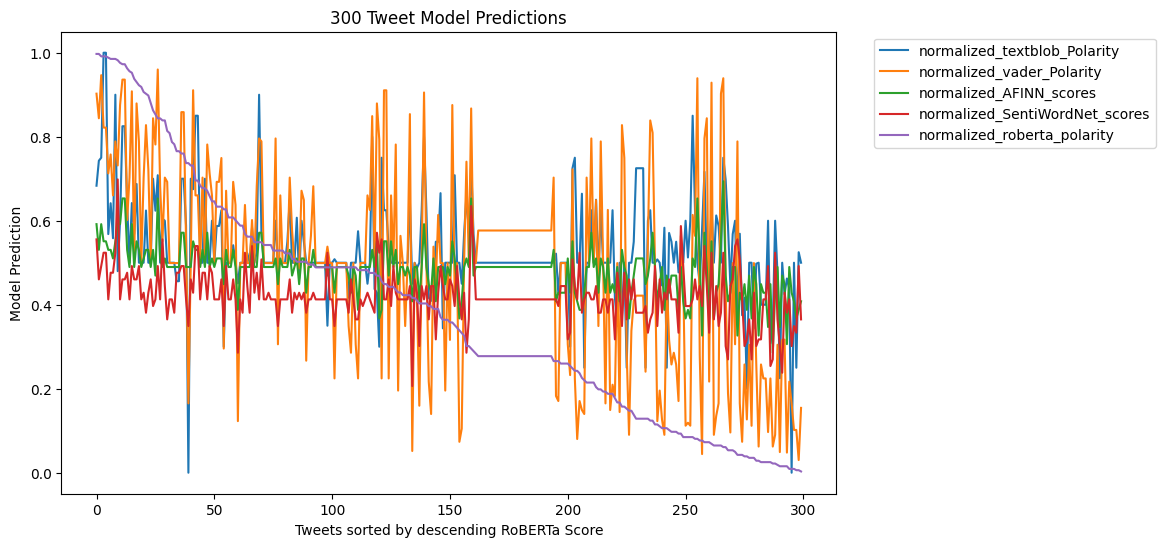

In [12]:
#plt.rcParams["figure.figsize"] = (10, 6)

x = range(df.loc[~df['our_label'].isna()].shape[0])
y = df.loc[~df['our_label'].isna()][score_cols].sort_values('normalized_roberta_polarity', ascending=False)
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, label=score_cols)
plt.title('300 Tweet Model Predictions')
plt.xlabel('Tweets sorted by descending RoBERTa Score')
plt.ylabel('Model Prediction')

#plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [13]:
df.loc[~df['our_label'].isna()][score_cols].describe()

,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.529950,0.494492,0.481701,0.421217,0.388829
std,0.122802,0.236048,0.058153,0.061624,0.272628
min,0.000000,0.030185,0.285714,0.206349,0.002993
25%,0.500000,0.304659,0.448980,0.396825,0.156132
50%,0.500000,0.499164,0.489796,0.412698,0.361009
75%,0.584162,0.660319,0.510204,0.444444,0.532230
max,1.000000,0.960041,0.693878,0.698413,0.997139


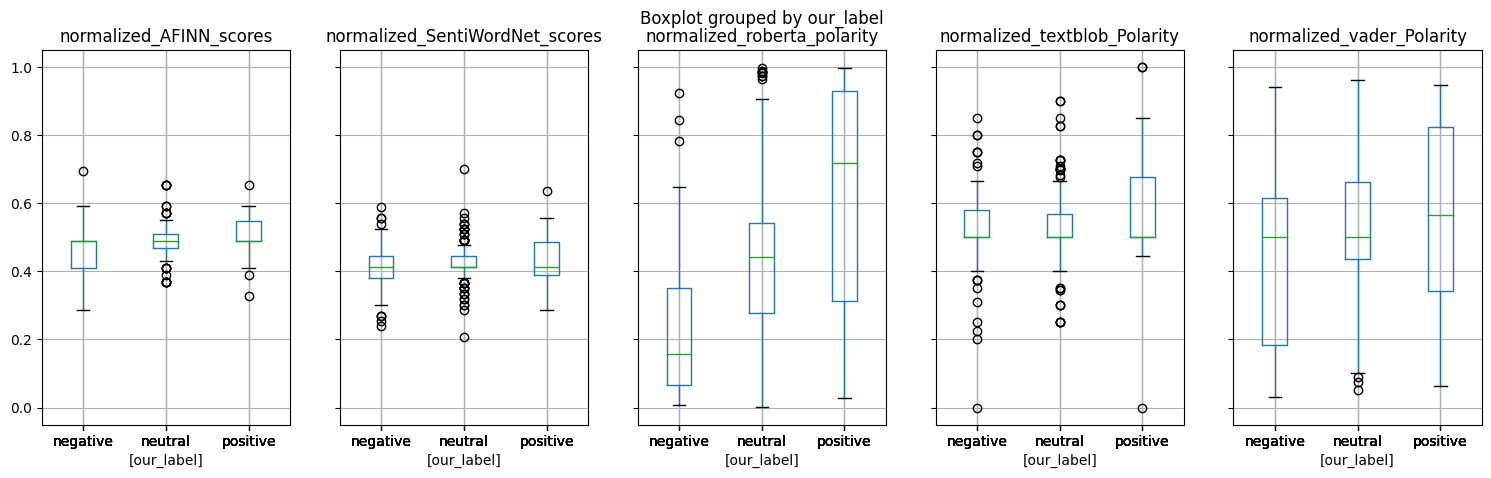

In [14]:
plot_cols = score_cols + ['our_label']
plot_df = df.loc[~df['our_label'].isna()][plot_cols]
fig = plot_df.boxplot(layout=(1,5), figsize=(18,5), by='our_label')

#plot_df = df[score_cols]
#plot_df.boxplot(figsize=(18,5))
plt.show()

# All Tweets

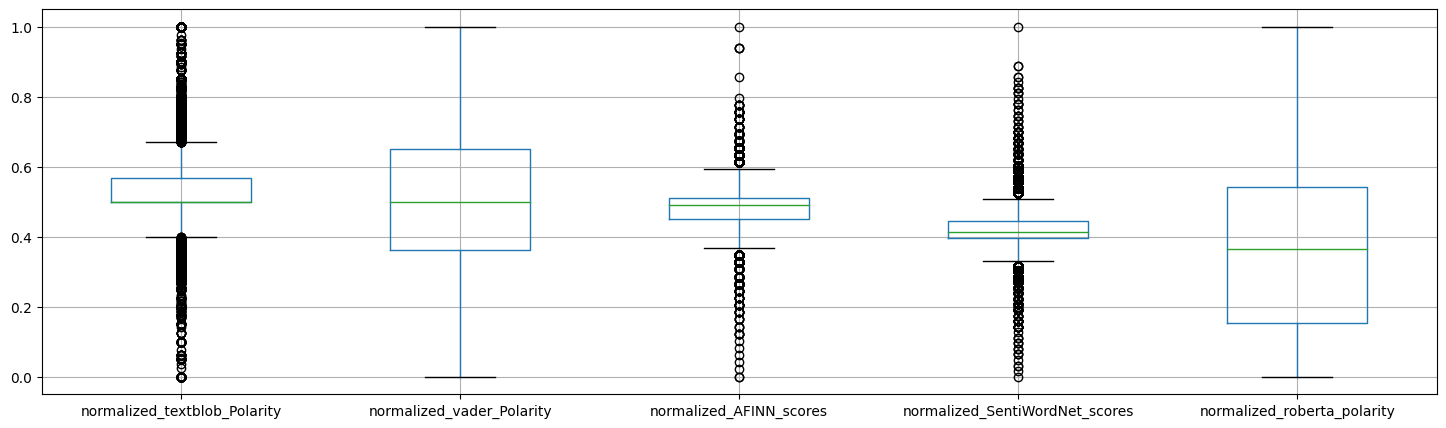

In [15]:
#plot_df = df.loc[~df['our_label'].isna()][score_cols]
#plot_df.boxplot(layout=(1,5), figsize=(18,5), by='our_label')
fig = plot_df = df[score_cols]
plot_df.boxplot(figsize=(18,5))
plt.show()

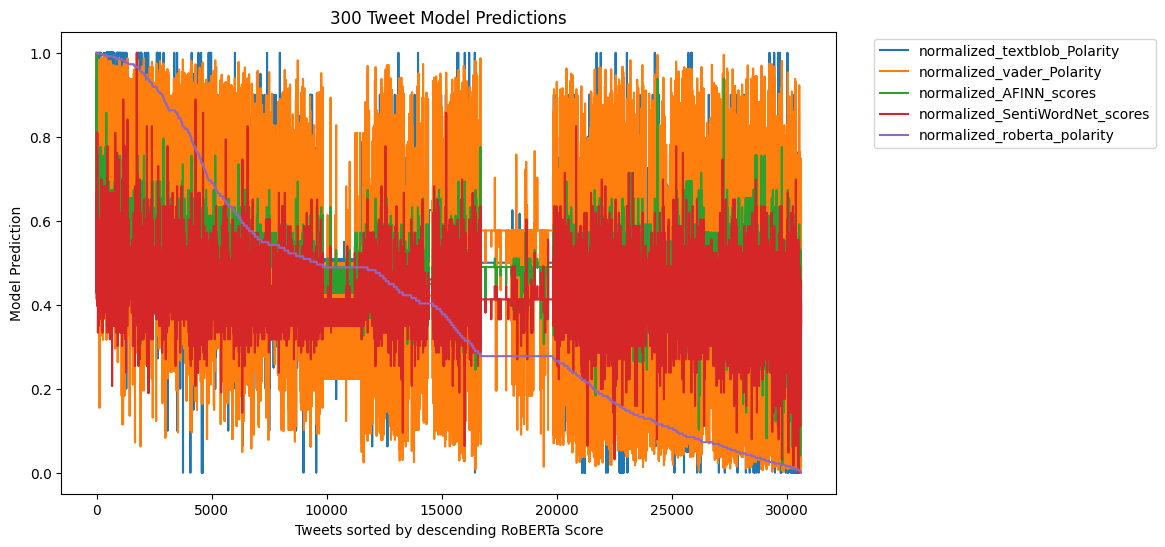

In [16]:
# A Hot Mess...

#plt.rcParams["figure.figsize"] = (10, 6)

x = range(df.shape[0])
y = df[score_cols].sort_values('normalized_roberta_polarity', ascending=False)
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, label=score_cols)
plt.title('300 Tweet Model Predictions')
plt.xlabel('Tweets sorted by descending RoBERTa Score')
plt.ylabel('Model Prediction')

#plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

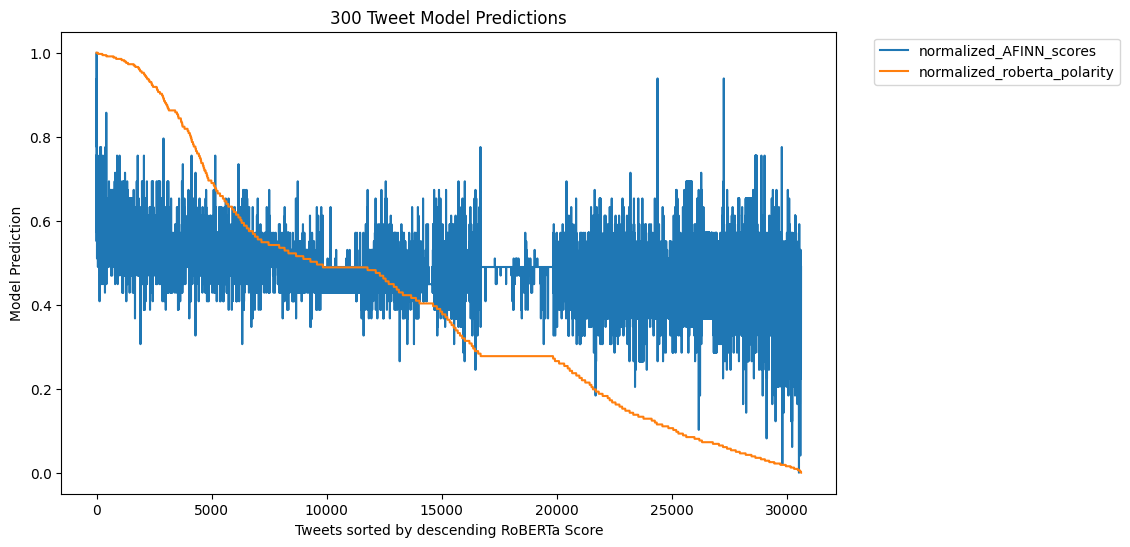

In [17]:
# Without Vader?

plot_cols = [#'normalized_textblob_Polarity',
             'normalized_AFINN_scores',
             #'normalized_SentiWordNet_scores',
             'normalized_roberta_polarity'
            ]

x = range(df.shape[0])
y = df[plot_cols].sort_values('normalized_roberta_polarity', ascending=False)
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, label=plot_cols)
plt.title('300 Tweet Model Predictions')
plt.xlabel('Tweets sorted by descending RoBERTa Score')
plt.ylabel('Model Prediction')

#plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# So how do models stack up on annotated tweets?

In [18]:
df[score_cols].corr()

,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity
normalized_textblob_Polarity,1.000000,0.440644,0.461542,0.377246,0.395069
normalized_vader_Polarity,0.440644,1.000000,0.827546,0.390117,0.497484
normalized_AFINN_scores,0.461542,0.827546,1.000000,0.388647,0.485962
normalized_SentiWordNet_scores,0.377246,0.390117,0.388647,1.000000,0.266572
normalized_roberta_polarity,0.395069,0.497484,0.485962,0.266572,1.000000


# k-means
- can we k-means cluster all the 300 tweets and see what our annotations are by colors?

In [19]:
df = pd.read_json('../../data/five_models_normalized_categorical_2023-04-17_23.29.43.888250.json')

# pare down our data to do kmeans
annot_df = df.loc[~df['our_label'].isna()]
annot_df = annot_df[['our_label','normalized_vader_Polarity', 
                    'normalized_AFINN_scores', 'normalized_SentiWordNet_scores',
                    'normalized_roberta_polarity', 'normalized_textblob_Polarity'
                   ]]
annot_df.head()

,our_label,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity,normalized_textblob_Polarity
185,neutral,0.781464,0.469388,0.412698,0.853285,0.623918
285,neutral,0.601621,0.530612,0.539683,0.562016,0.583333
359,positive,0.702710,0.489796,0.412698,0.955853,0.500000
416,neutral,0.576703,0.489796,0.412698,0.277563,0.500000
638,positive,0.858546,0.571429,0.492063,0.759974,0.700000


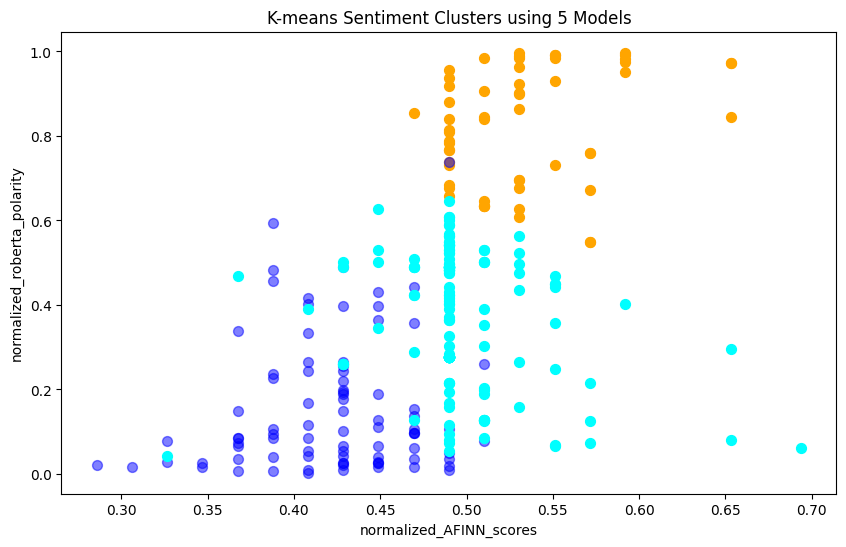

In [20]:
from sklearn.cluster import KMeans

# find our most important features:  
# https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240


# Create clusters using our models
X = annot_df.drop('our_label', axis=1).to_numpy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)

#predict the labels of clusters.
annot_df['label'] = kmeans.fit_predict(X)
 
#print(label)  # big array of 0, 1, 2's

#filtered_label2 = df[label == 2]
class_0 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 0]
class_1 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 1]
class_2 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 2]

#class_1 = annot_df.loc[annot_df['label'] == 1]
#class_2 = annot_df.loc[annot_df['label'] == 2]

model1 = 'normalized_AFINN_scores'
model2 = 'normalized_roberta_polarity'

#plt.scatter(class_0)
plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=.5)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()

#### Try with RoBERTa and vader, since vader and afinn have really high correlation
If afinn and vader are too similar, try vader with roberta and contrast performance with above

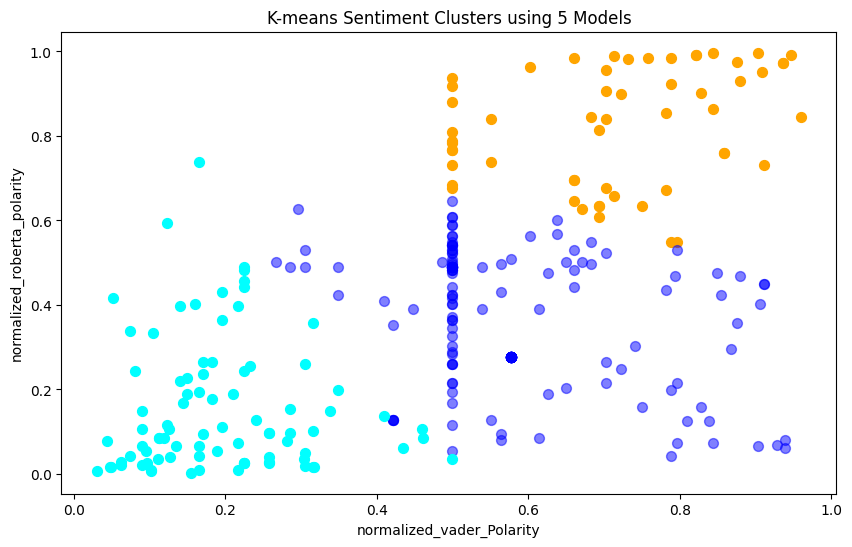

In [21]:
from sklearn.cluster import KMeans

# find our most important features:  
# https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240


# Create clusters using our models
X = annot_df.drop('our_label', axis=1).to_numpy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)

#predict the labels of clusters.
annot_df['label'] = kmeans.fit_predict(X)
 
#print(label)  # big array of 0, 1, 2's

#filtered_label2 = df[label == 2]
class_0 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 0]
class_1 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 1]
class_2 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 2]

#class_1 = annot_df.loc[annot_df['label'] == 1]
#class_2 = annot_df.loc[annot_df['label'] == 2]

model1 = 'normalized_vader_Polarity'
model2 = 'normalized_roberta_polarity'

#plt.scatter(class_0)
plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=.5)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()

## Variations

- Can the marker be the annotated value "our_label" somehow?  Can add new field if needed.  (NO)
- but maybe we plot Roberta vs our label, with our labels set to 0 for negative, .5 for neutral, 1 for positive?
- What happens if we cluster all 30k data? Is that just too much?

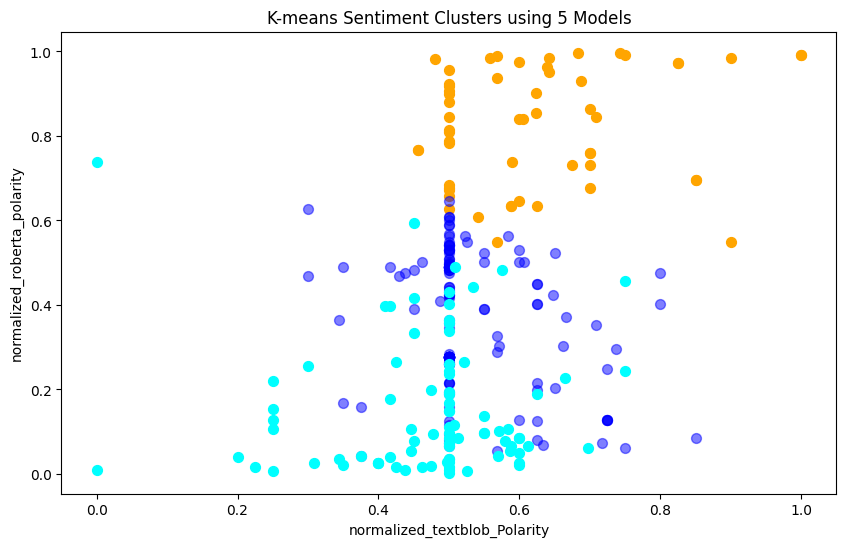

In [22]:
# This is a bunch of combinations of looking at clustering.  
# It's clear that vader/roberta give the best clustering, particularly considering that this is a continuum.

from sklearn.cluster import KMeans

# find our most important features:  
# https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240

annot_df['our_label_marker'] = 0

# Create clusters using our models
X = annot_df.drop('our_label', axis=1).to_numpy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)

#predict the labels of clusters.
annot_df['label'] = kmeans.fit_predict(X)
annot_df['our_label_marker'] = np.where(annot_df['our_label'] == 'neutral', 0.5, 
                                       (np.where(annot_df['our_label'] == 'positive', 1, 0)))
 
#print(label)  # big array of 0, 1, 2's

#filtered_label2 = df[label == 2]
class_0 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 0]
class_1 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 1]
class_2 = annot_df.drop('our_label', axis=1).loc[annot_df['label'] == 2]

#class_1 = annot_df.loc[annot_df['label'] == 1]
#class_2 = annot_df.loc[annot_df['label'] == 2]

#model1 = 'our_label_marker'
#model1 = 'normalized_vader_Polarity'
#model1 = 'normalized_SentiWordNet_scores' # nog good w/ roberta
model1 = 'normalized_textblob_Polarity'  # not great either
model2 = 'normalized_roberta_polarity'  # meh
#model2 = 'normalized_vader_Polarity'
#model2 = 'normalized_SentiWordNet_scores' # bad
#model2 = 'normalized_textblob_Polarity' # bad


#plt.scatter(class_0)
plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=.5)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()

/var/folders/_6/sw6bkxzd6qb427cxrbw2kfv40000gn/T/ipykernel_60152/1418450796.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['label'] = kmeans.fit_predict(X)


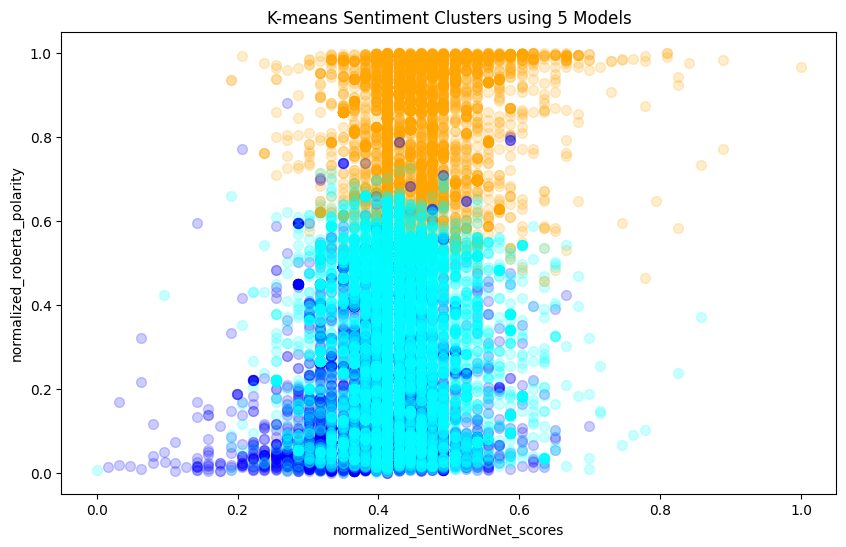

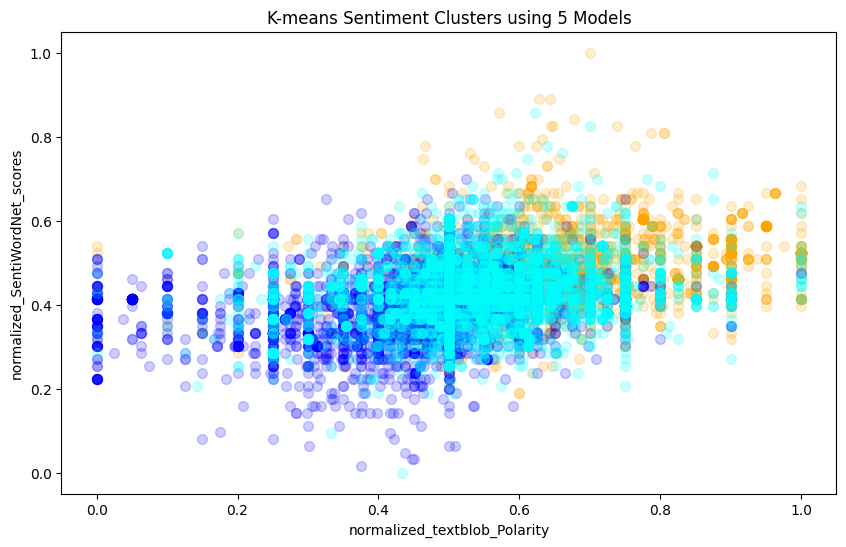

In [23]:
# Let's try all of them, with some significant alpha happening...

from sklearn.cluster import KMeans

# find our most important features:  
# https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240

all_df = df[['our_label','normalized_vader_Polarity', 
                    'normalized_AFINN_scores', 'normalized_SentiWordNet_scores',
                    'normalized_roberta_polarity', 'normalized_textblob_Polarity'
                   ]]

# Create clusters using our models
X = all_df.drop('our_label', axis=1).to_numpy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)

#predict the labels of clusters.
all_df['label'] = kmeans.fit_predict(X)
 
#print(label)  # big array of 0, 1, 2's

#filtered_label2 = df[label == 2]
class_0 = all_df.drop('our_label', axis=1).loc[all_df['label'] == 0]
class_1 = all_df.drop('our_label', axis=1).loc[all_df['label'] == 1]
class_2 = all_df.drop('our_label', axis=1).loc[all_df['label'] == 2]


#model1 = 'our_label_marker'
#model1 = 'normalized_vader_Polarity'
model1 = 'normalized_SentiWordNet_scores' # nog good w/ roberta
#model1 = 'normalized_textblob_Polarity'  # not great either
model2 = 'normalized_roberta_polarity'  # meh
#model2 = 'normalized_vader_Polarity'
#model2 = 'normalized_SentiWordNet_scores' # bad
#model2 = 'normalized_textblob_Polarity' # bad


a = .2

plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50, alpha=a)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=a)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50, alpha=a)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()

#################

#model1 = 'our_label_marker'
#model1 = 'normalized_vader_Polarity'
#model1 = 'normalized_SentiWordNet_scores' # nog good w/ roberta
model1 = 'normalized_textblob_Polarity'  # not great either
#model2 = 'normalized_roberta_polarity'  # meh
#model2 = 'normalized_vader_Polarity'
model2 = 'normalized_SentiWordNet_scores' # bad
#model2 = 'normalized_textblob_Polarity' # bad

plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50, alpha=a)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=a)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50, alpha=a)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()


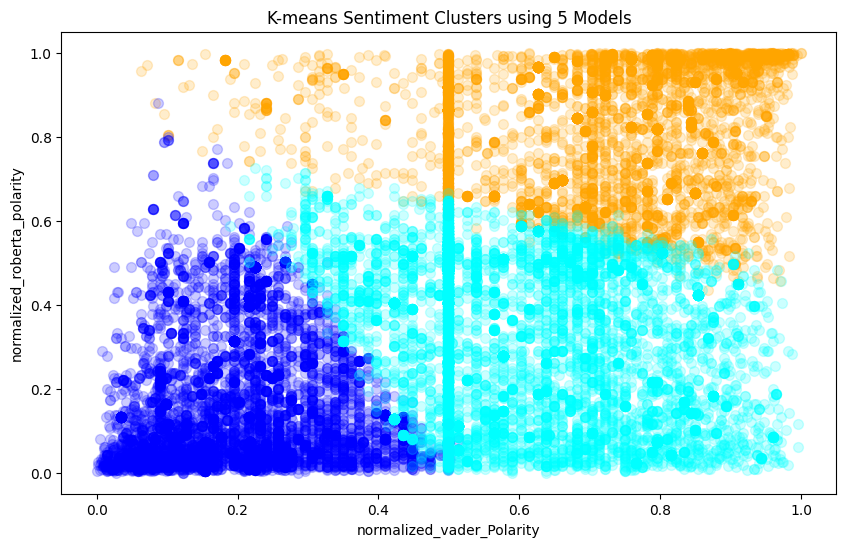

In [24]:
#model1 = 'our_label_marker'
model1 = 'normalized_vader_Polarity'
#model1 = 'normalized_SentiWordNet_scores' # nog good w/ roberta
#model1 = 'normalized_textblob_Polarity'  # not great either
model2 = 'normalized_roberta_polarity'  # meh
#model2 = 'normalized_vader_Polarity'
#model2 = 'normalized_SentiWordNet_scores' # bad
#model2 = 'normalized_textblob_Polarity' # bad

plt.scatter(class_0.loc[:,model1] , 
            class_0.loc[:,model2] , color = 'orange', s=50, alpha=a)
plt.scatter(class_1.loc[:,model1] , 
            class_1.loc[:,model2] , color = 'blue', s=50, alpha=a)
plt.scatter(class_2.loc[:,model1] , 
            class_2.loc[:,model2] , color = 'cyan', s=50, alpha=a)
plt.title(f'K-means Sentiment Clusters using 5 Models')
plt.xlabel(f'{model1}')
plt.ylabel(f'{model2}')
plt.show()


# ensemble?

- If I just use a combination of vader and roberta, how close can I get to my annotations?
- Alternatively, should I try a random forest and see if it can make my ensemble?

In [25]:
# Play around with vader and roberta making an ensemble score

annot_df.head()
annot_df['ensemble_score'] = (annot_df['normalized_roberta_polarity'] + annot_df['normalized_vader_Polarity'])/2
annot_df['ensemble_label'] = np.where(annot_df['ensemble_score'] > max_neutral, 'positive', 
                                      (np.where(annot_df['ensemble_score'] < min_neutral, 'negative', 'neutral')))

# Make a confusion matrix:
#annot_df[['ensemble_label', 'our_label']]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


y_true = annot_df['our_label'].to_numpy()
y_pred = annot_df['ensemble_label'].to_numpy()
# y_true = np.array([[0,0,1], [1,1,0],[0,1,0]])
# y_pred = np.array([[0,0,1], [1,0,1],[1,0,0]])

# labels = ["A", "B", "C"]

# conf_mat_dict={}

# for label_col in range(len(labels)):
#     y_true_label = y_true[:, label_col]
#     y_pred_label = y_pred[:, label_col]
#     conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


# for label, matrix in conf_mat_dict.items():
#     print("Confusion matrix for label {}:".format(label))
#     print(matrix)

In [26]:
# Credits: 
# https://stackoverflow.com/questions/53886370/multi-class-multi-label-confusion-matrix-with-sklearn

from sklearn.preprocessing import LabelEncoder

my_encoder = LabelEncoder()
annot_df['our_label_numeric'] = my_encoder.fit_transform(annot_df['our_label'])
annot_df['ensemble_label_numeric'] = my_encoder.fit_transform(annot_df['ensemble_label'])

#display(annot_df.head(10))
#print(annot_df[['our_label_numeric', 'ensemble_label_numeric']].describe())

y_tru = annot_df['our_label_numeric']
y_pre = annot_df['ensemble_label_numeric']


cm = confusion_matrix(y_true=y_tru, 
                 y_pred=y_pre)

cm

array([[48, 37,  8],
       [42, 96, 35],
       [ 9,  7, 18]])

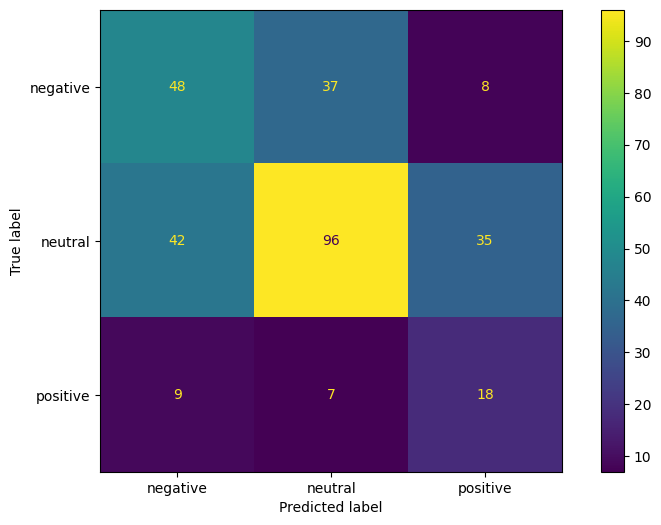

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=my_encoder.classes_)
disp.plot()

plt.show()

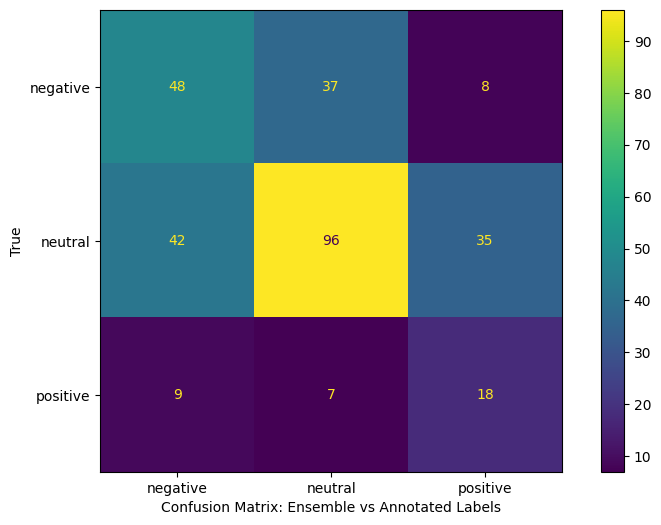

In [33]:
# Work on format: 
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels (way down)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=my_encoder.classes_)
disp.plot()
disp.ax_.set(xlabel='Confusion Matrix: Ensemble vs Annotated Labels', ylabel='True')

plt.show()

#### and cohen's kappa

In [28]:
### ALSO WHAT IS OUR COHEN'S KAPPA???

In [29]:
annot_df.columns

Index(['our_label', 'normalized_vader_Polarity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'normalized_roberta_polarity',
       'normalized_textblob_Polarity', 'label', 'our_label_marker',
       'ensemble_score', 'ensemble_label', 'our_label_numeric',
       'ensemble_label_numeric'],
      dtype='object')

In [30]:
annot_df.head()

,our_label,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity,normalized_textblob_Polarity,label,our_label_marker,ensemble_score,ensemble_label,our_label_numeric,ensemble_label_numeric
185,neutral,0.781464,0.469388,0.412698,0.853285,0.623918,0,0.5,0.817374,positive,1,2
285,neutral,0.601621,0.530612,0.539683,0.562016,0.583333,1,0.5,0.581818,neutral,1,1
359,positive,0.702710,0.489796,0.412698,0.955853,0.500000,0,1.0,0.829281,positive,2,2
416,neutral,0.576703,0.489796,0.412698,0.277563,0.500000,1,0.5,0.427133,neutral,1,1
638,positive,0.858546,0.571429,0.492063,0.759974,0.700000,0,1.0,0.809260,positive,2,2
